# MINIST 

## 准备数据

In [14]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784') 
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


'5'

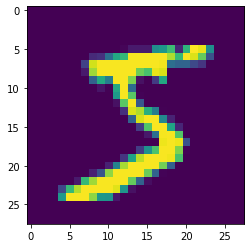

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28))
y[0]

In [30]:
X,y=mnist['data'],mnist['target']

In [31]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [32]:
import numpy as np
shuffle_index=np.random.permutation(6000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

## 定义与训练模型

In [54]:
from sklearn.neighbors import KNeighborsClassifier,DistanceMetric
clf=KNeighborsClassifier()

In [56]:
from sklearn.model_selection import GridSearchCV
params={
    'n_neighbors':[3,4,5,6],
    'p':[2,3],
    'weights':['uniform','distance'],
    'algorithm':['auto'],
    'n_jobs':[-1]
}
grid_cv=GridSearchCV(clf,params,n_jobs=-1,cv=5,verbose=3)

In [59]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'n_neighbors': [3, 4, 5, 6],
                         'p': [2, 3], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
grid_cv.best_score_

0.9480000000000001

In [66]:
best_clf=grid_cv.best_estimator_
best_clf.score(X_train,y_train)

1.0

In [73]:
best_clf.n_jobs=-1

## 训练集上评估

In [74]:
y_train_pred=best_clf.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

[[592   0   0   0   0   0   0   0   0   0]
 [  0 671   0   0   0   0   0   0   0   0]
 [  0   0 581   0   0   0   0   0   0   0]
 [  0   0   0 608   0   0   0   0   0   0]
 [  0   0   0   0 623   0   0   0   0   0]
 [  0   0   0   0   0 514   0   0   0   0]
 [  0   0   0   0   0   0 608   0   0   0]
 [  0   0   0   0   0   0   0 651   0   0]
 [  0   0   0   0   0   0   0   0 551   0]
 [  0   0   0   0   0   0   0   0   0 601]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       592
           1       1.00      1.00      1.00       671
           2       1.00      1.00      1.00       581
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       623
           5       1.00      1.00      1.00       514
           6       1.00      1.00      1.00       608
           7       1.00      1.00      1.00       651
           8       1.00      1.00      1.00       551
           9       1.00     

## 在测试集上

In [75]:
y_test_pred=best_clf.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[ 969    1    1    0    0    2    6    1    0    0]
 [   0 1128    1    2    0    0    3    1    0    0]
 [  12   18  957    8    1    0    6   22    7    1]
 [   2    2    5  935    1   27    5   10   15    8]
 [   1   15    2    0  909    0    9    2    2   42]
 [   5    4    0   20    3  828   13    2    6   11]
 [  13    5    1    0    2    4  933    0    0    0]
 [   1   33    6    1    6    1    0  954    0   26]
 [  10    3    9   21    7   14    5    6  876   23]
 [   4    7    2    8   15    4    0   13    7  949]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.97      0.93      0.95      1032
           3       0.94      0.93      0.93      1010
           4       0.96      0.93      0.94       982
           5       0.94      0.93      0.93       892
           6       0.95      0.97      0.96       958
           7       0.94      0.93   

In [ ]:
# 保存模型


# Titanic

## eda

In [1]:
import pandas as pd
import numpy as np
data_test=pd.read_csv('D:/zhengjing/ExercisePython/Pytorch/data/titanic_test.csv')
data_train=pd.read_csv('D:/zhengjing/ExercisePython/Pytorch/data/titanic_train.csv')

In [2]:
from sklearn.model_selection import train_test_split
data_train,testset=train_test_split(data_train,test_size=0.2,random_state=42)

In [5]:
print(data_train['Survived'].value_counts())
print(data_train.info())
data_train.describe()

0    444
1    268
Name: Survived, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 预处理

In [158]:
numattrs=["Age", "SibSp", "Parch", "Fare"]
catattrs=["Pclass", "Sex", "Embarked"]
from sklearn.base import BaseEstimator,TransformerMixin
class dataselector(BaseEstimator,TransformerMixin):
    def __init__(self,attrname):
        self.attrname=attrname
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attrname]

In [159]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
num_pipeline=Pipeline([
    ('numselector',dataselector(numattrs)),
    ('imputer',SimpleImputer(strategy='median'))
])

In [160]:
class mostfrequentimpute(BaseEstimator,TransformerMixin):
    def __init__(self,catattrs):
        self.catattrs=catattrs
    def fit(self,X,y=None):
        self.mfv=[X[s].value_counts().index[0] for s in catattrs]
        return self
    def transform(self,X,y=None):
        return X[self.catattrs].fillna(dict(zip(catattrs,self.mfv)))

In [161]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline=Pipeline([
    ('catselector',dataselector(catattrs)),
    ('inputer',mostfrequentimpute(catattrs)),
    ('OneHotEncoder',OneHotEncoder(sparse=False))
])

In [162]:
full_preprocess=FeatureUnion([
    ('numpipe',num_pipeline),
    ('catpipe',cat_pipeline)
])

In [163]:
X_prepared=full_preprocess.fit_transform(data_train)
y_prepared=data_train.Survived

In [170]:
X_train_test=full_preprocess.transform(testset)
y_train_test=testset.Survived

## 定义和训练

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf=SVC()
clf?

In [165]:
from sklearn.model_selection import GridSearchCV
params={
    'C':[0.1,1,10],
    'kernel':['linear','rbf','sigmoid'],
    'degree':[2,3,4],
    'gamma':['scale','auto'],
    'verbose':[True]
}
grid_search=GridSearchCV(clf,params,n_jobs=-1,verbose=True,cv=5)

In [166]:
grid_search.fit(X_prepared,y_prepared)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 255 out of 270 | elapsed:  3.2min remaining:   11.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  4.0min finished


[LibSVM]

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'verbose': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [189]:
clf_best=grid_search.best_estimator_
y_pred=clf_best.predict(X_prepared)
from sklearn.model_selection import cross_val_score
print(pd.Series(y_pred==y_prepared).mean())
cross_val_score(clf_best,X_prepared,y_prepared)

0.7879213483146067
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.7972028 , 0.8041958 , 0.75352113, 0.76056338, 0.82394366])

In [191]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_prepared,y_prepared)
cross_val_score(clf,X_prepared,y_prepared,cv=10)

array([0.81944444, 0.76388889, 0.73239437, 0.83098592, 0.81690141,
       0.77464789, 0.78873239, 0.77464789, 0.76056338, 0.87323944])

In [193]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [168]:
grid_search.best_score_

0.7878853540825371

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score()

# Spam Classifier

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()
        
def fetch_spam_data(spam_url=SPAM_URL,spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename,url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path,filename)
        if not os.path.isfile()

In [2]:
fetch_spam_data()

In [4]:
import pandas as pd
HAM_DIR=os.path.join(SPAM_PATH,'easy_ham')
SPAM_DIR=os.path.join(SPAM_PATH,'spam')
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [8]:
len(ham_filenames),len(spam_filenames)

(2500, 500)

In [ ]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [13]:
import email
import email.policy
def load_email(is_spam,filename,mail_path=SPAM_PATH):
    directory='sapm' if is_spam else 'easy_ham'
    with open(os.path.join(mail_path,directory,filename)) as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

TypeError: underlying read() should have returned a bytes-like object, not 'str'

In [12]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

TypeError: underlying read() should have returned a bytes-like object, not 'str'

In [6]:
import modin.pandas as pd

In [7]:
import pandas as pd
pd._version.get_versions()

{'dirty': False,
 'error': None,
 'full-revisionid': 'b687cd4d9e520666a956a60849568a98dd00c672',
 'version': '1.0.5'}